<a href="https://colab.research.google.com/github/alowjw08/Crab-Age-Prediction-Using-Regression/blob/main/Crab_Age_Prediction_Using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crab Age Prediction Using Regression

Allison Low Jia Wen 23051818/1

## Data Analysis

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import pandas as pd

#read dataset
df = pd.read_csv('/content/drive/MyDrive/ModifiedCrabAgePrediction.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3500 non-null   object 
 1   Length          3456 non-null   float64
 2   Diameter        3468 non-null   float64
 3   Height          3413 non-null   float64
 4   Weight          3462 non-null   float64
 5   Shucked Weight  3500 non-null   float64
 6   Viscera Weight  3500 non-null   float64
 7   Shell Weight    3500 non-null   float64
 8   Age             3500 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 246.2+ KB


Features: sex, length, diameter, height, weight, shucked weight, viscera weight, shell weight
>
Target variable: age

Dataset seems to have sufficient dimensions, with adequate number of rows and columns for data analysis and model training purposes.

In [ ]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3456.000000,3468.000000,3413.000000,3462.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1.314131,1.022365,0.350509,23.786946,10.283194,5.168507,6.831221,9.977714
std,0.299806,0.248250,0.106293,13.920088,6.297363,3.116262,3.945384,3.216236
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.813974,5.372230,2.689659,3.752765,8.000000
50%,1.375000,1.062500,0.362500,23.119017,9.695529,4.890289,6.704657,10.000000
75%,1.537500,1.200000,0.412500,33.020080,14.330672,7.257472,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [ ]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


## Data Preprocessing


###Handling Null Values

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Sex                0
Length            44
Diameter          32
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64


In [ ]:
#assessing impact of dropping entire rows containing >=1 null values:
print("Number of Rows (Before Dropping Entire Rows Containing >=1 Null Values):", df.shape[0]) # shape retrives dimension of df, dimension 0 means row

#drop rows with null values
df_cleaned = df.dropna()

#print the number of rows after dropping null values
print("Number of Rows (After Dropping Entire Rows Containing >=1 Null Values):", df_cleaned.shape[0])

Number of Rows (Before Dropping Entire Rows Containing >=1 Null Values): 3500
Number of Rows (After Dropping Entire Rows Containing >=1 Null Values): 3308


Am worried that dropping all null values would lead to bias. Proceed with imputation.

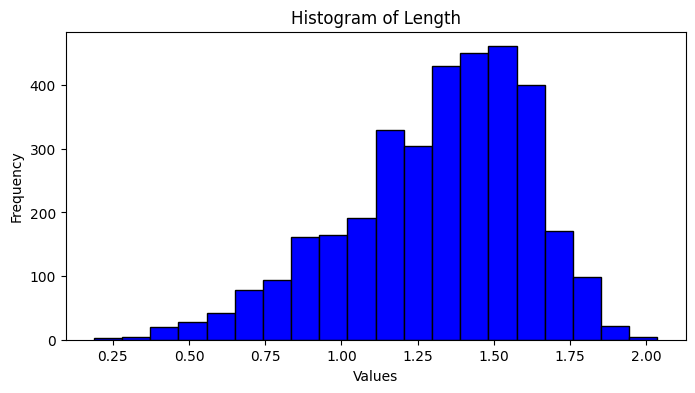

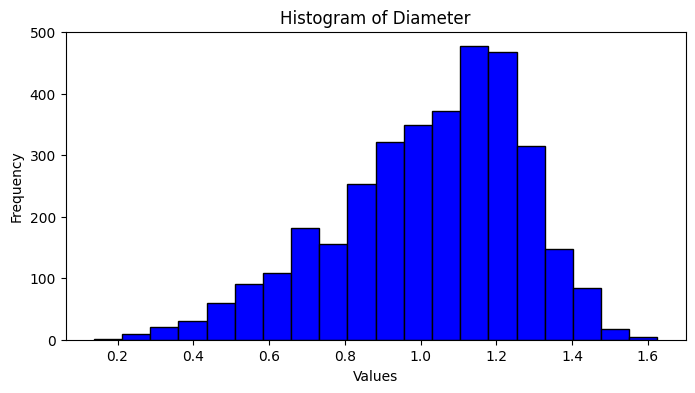

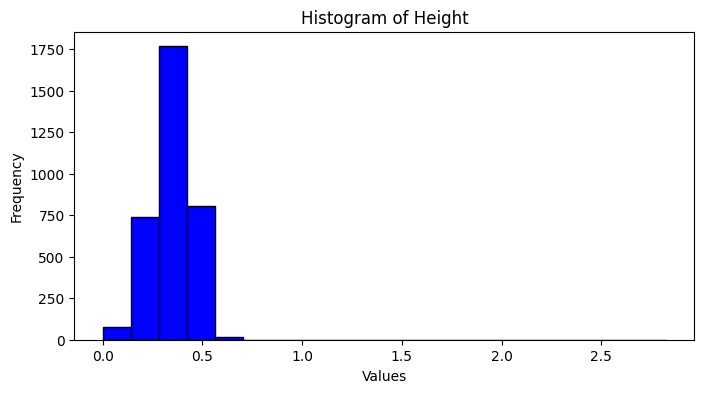

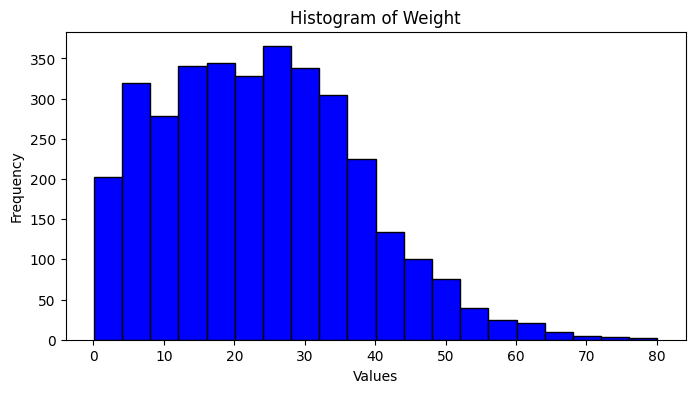

In [ ]:
import matplotlib.pyplot as plt

numerical_columns = ['Length', 'Diameter', 'Height', 'Weight']

#visualize distribution to determine imputation implementation
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

Proceed with median imputation for all columns containing missing values as they all have skewed distribution.

In [ ]:
#perform median imputation for all columns with missing values as they display skewness
#all columns containing null values are numerical columns
numerical_columns = ['Length', 'Diameter', 'Height', 'Weight']
for col in numerical_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

#display updated df with missing value counts
print("Missing Values Summary:")
print(df.isnull().sum())

Missing Values Summary:
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


###Handling Duplicate Values

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3500 non-null   object 
 1   Length          3500 non-null   float64
 2   Diameter        3500 non-null   float64
 3   Height          3500 non-null   float64
 4   Weight          3500 non-null   float64
 5   Shucked Weight  3500 non-null   float64
 6   Viscera Weight  3500 non-null   float64
 7   Shell Weight    3500 non-null   float64
 8   Age             3500 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.4+ KB


There were no duplicates.

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


###Data Normalisation

In [ ]:
#normalisation on numerical columns
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Length', 'Diameter', 'Height', 'Weight',
                     'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']

df[numerical_columns] = MinMaxScaler().fit_transform(df[numerical_columns])

print(df)

     Sex    Length  Diameter    Height    Weight  Shucked Weight  \
0      F  0.675676  0.697479  0.146018  0.307066        0.291863   
1      M  0.378378  0.344538  0.075221  0.066761        0.053800   
2      I  0.459459  0.428571  0.088496  0.098636        0.075992   
3      F  0.533784  0.504202  0.088496  0.167700        0.111970   
4      I  0.378378  0.352941  0.075221  0.085532        0.081372   
...   ..       ...       ...       ...       ...             ...   
3495   I  0.405405  0.369748  0.084071  0.086595        0.073302   
3496   F  0.736486  0.722689  0.154867  0.429786        0.365837   
3497   I  0.236486  0.218487  0.057522  0.024438        0.017485   
3498   I  0.472973  0.428571  0.092920  0.128564        0.106254   
3499   I  0.324324  0.319328  0.075221  0.050115        0.034970   

      Viscera Weight  Shell Weight       Age  
0           0.258723      0.235675  0.285714  
1           0.063199      0.053313  0.178571  
2           0.073733      0.095665  0.1785

###Data Scaling

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#separate numerical and categorical columns
numerical_columns = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight',
                'Shell Weight', 'Age']
categorical_columns = ['Sex']

#define transformations for numerical and categorical columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

#column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])

#fit and transform data
X_processed = preprocessor.fit_transform(df[numerical_columns + categorical_columns])

#convert transformed data back to a df
columns = numerical_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
X_processed_df = pd.DataFrame(X_processed, columns=columns)

#display processed df
print(X_processed_df.head())

#concat the transformed features with the original df
df = pd.concat([df.drop(columns=numerical_columns + categorical_columns), X_processed_df], axis=1)

#display processed df
print(df.head())

     Length  Diameter    Height    Weight  Shucked Weight  Viscera Weight  \
0  0.411491  0.616203  0.587749  0.061840        0.325395        0.133623   
1 -1.434460 -1.508386 -1.317655 -1.327732       -1.268472       -1.217516   
2 -0.931019 -1.002531 -0.960392 -1.143411       -1.119891       -1.144727   
3 -0.469531 -0.547262 -0.960392 -0.744050       -0.879010       -0.926361   
4 -1.434460 -1.457800 -1.317655 -1.219188       -1.083871       -1.181121   

   Shell Weight       Age  Sex_F  Sex_I  Sex_M  
0     -0.021304 -0.304037    1.0    0.0    0.0  
1     -1.336436 -1.236937    0.0    0.0    1.0  
2     -1.031009 -1.236937    0.0    1.0    0.0  
3     -0.402189  0.006930    1.0    0.0    0.0  
4     -1.300503 -1.236937    0.0    1.0    0.0  
     Length  Diameter    Height    Weight  Shucked Weight  Viscera Weight  \
0  0.411491  0.616203  0.587749  0.061840        0.325395        0.133623   
1 -1.434460 -1.508386 -1.317655 -1.327732       -1.268472       -1.217516   
2 -0.931019 

In [ ]:
print(df.columns)

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')


###Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#separate target variable 'Age' from the features
y = df['Age']
X = df.drop(columns=['Age'], axis=1)

#split dataset into training and testing sets (70% train, 30% test as dataset is quite small)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#define column transformer for preprocessing
numeric_features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
categorical_features = ['Sex_F', 'Sex_I', 'Sex_M']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # drop the first column to avoid multicollinearity

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#create a pipeline with preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#fit and transform the training data
X_train_processed = pipeline.fit_transform(X_train)
#transform the test data
X_test_processed = pipeline.transform(X_test)

#print shapes of the training and testing sets to verify the splitting process has been performed correctly
print("Shape of X_train:", X_train_processed.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test_processed.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (2450, 10)
Shape of y_train: (2450,)
Shape of X_test: (1050, 10)
Shape of y_test: (1050,)


## Regression Model Development

###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#initialize LR model
linear_model = LinearRegression()

#fit model on preprocessed training data
linear_model.fit(X_train_processed, y_train)

#predictions on the preprocessed test data
linear_predictions = linear_model.predict(X_test_processed)

#evaluate model
mse = mean_squared_error(y_test, linear_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linear_predictions)

#evaluation metrics
print("Initial Linear Regression Model")
print("Minimum MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

Initial Linear Regression Model
Minimum MSE: 0.47303457947823335
RMSE: 0.6877750936739665
R-squared: 0.479745065063643


Results seem to suggest that the linear regression model explains approximately 48% of the variance in the target variable and has moderate level of predictive performance.

Check for overfitting:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#predictions on training and testing data
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

#evaluate the model on training data
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

#evaluate the model on testing data
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

#evaluation metrics
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R-squared:", train_r2)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R-squared:", test_r2)


Training MSE: 0.4959801537727281
Training RMSE: 0.7042585844508593
Training R-squared: 0.5215142895403279
Testing MSE: 0.4730345794782333
Testing RMSE: 0.6877750936739664
Testing R-squared: 0.479745065063643


The model's performance on the testing dataset is similar to its performance on the training dataset, which suggests that the model is not overfitting. This conclusion is supported by the similar values of MSE, RMSE, and R-squared on both the training and testing datasets.

Next, experiment with different hyperparameters:

Lasso Regression:
Minimum Mean Squared Error: 0.552593843396056
Root Mean Squared Error: 0.7433665605850561
R-squared: 0.392243851687643


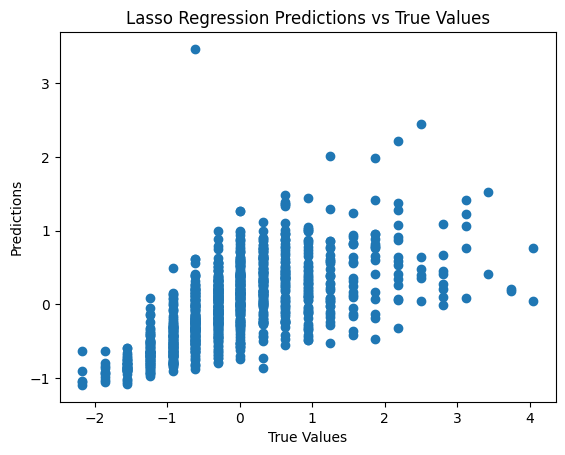

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#initialize Lasso Regression model
lasso_model = Lasso(alpha=0.1)  #alpha: regularization strength, higher alpha means more regularization

#fit the model on the preprocessed training data
lasso_model.fit(X_train_processed, y_train)

#predictions on the preprocessed test data
lasso_predictions = lasso_model.predict(X_test_processed)

#evaluate the model
mse_lasso = mean_squared_error(y_test, lasso_predictions)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, lasso_predictions)

#evaluation metrics
print("Lasso Regression:")
print("Minimum Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R-squared:", r2_lasso)

#visualization of predictions vs actual values for Lasso Regression
plt.scatter(y_test, lasso_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso Regression Predictions vs True Values')
plt.show()

Lasso Regression model performs slightly worse than the initial Linear Regression model in terms of both Minimum MSE and R-squared, indicates that Lasso Regression may be too aggressive in penalizing coefficients, resulting in higher prediction errors compared to initial model. RMSE for Lasso Regression is higher than the initial model, indicating larger errors in prediction.

Checking for overfitting:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#predictions on the training set
lasso_train_predictions = lasso_model.predict(X_train_processed)

#evaluate the model on the training set
mse_train = mean_squared_error(y_train, lasso_train_predictions)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, lasso_train_predictions)

#print training set evaluation metrics
print("Training MSE:", mse_train)
print("Training RMSE:", rmse_train)
print("Training R-squared:", r2_train)

#print testing set evaluation metrics (already calculated)
print("Testing MSE:", mse_lasso)
print("Testing RMSE:", rmse_lasso)
print("Testing R-squared:", r2_lasso)


Training MSE: 0.49611842197065287
Training RMSE: 0.7043567433982959
Training R-squared: 0.5213808984027697
Testing MSE: 0.47063317557228335
Testing RMSE: 0.6860270953630646
Testing R-squared: 0.48238618748269313


The model's performance on the testing set is comparable to that on the training set, indicating good generalization. It explains approximately 48.24% of the variance in the target variable, which is a moderate level of predictive ability.

Attempting Ridge regression:


Ridge Regression:
Minimum Mean Squared Error: 0.47296611591440807
Root Mean Squared Error: 0.6877253201056422
R-squared: 0.47982036295620445


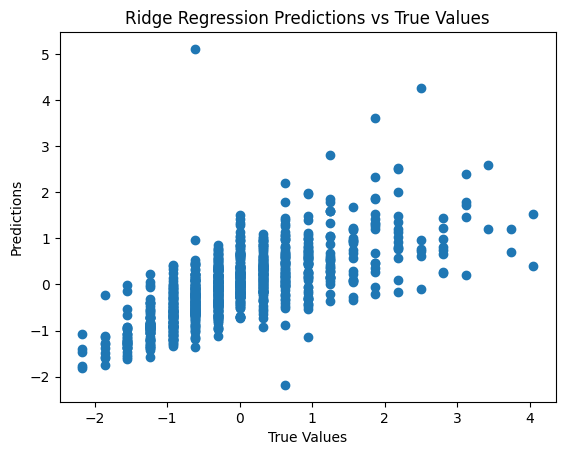

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

#initialize Ridge Regression model
ridge_model = Ridge(alpha=0.1)

#fit the model on the preprocessed training data
ridge_model.fit(X_train_processed, y_train)

#predictions on the preprocessed test data
ridge_predictions = ridge_model.predict(X_test_processed)

#evaluate the model
mse_ridge = mean_squared_error(y_test, ridge_predictions)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, ridge_predictions)

#evaluation metrics
print("\nRidge Regression:")
print("Minimum Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R-squared:", r2_ridge)

#visualization of predictions vs actual values for Ridge Regression
plt.scatter(y_test, ridge_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression Predictions vs True Values')
plt.show()

The Ridge Regression model performs similarly to the initial model in terms of Minimum MSE and R-squared. The RMSE for Ridge Regression is comparable to the initial model, indicating similar prediction errors.

Checking for overfitting:

In [ ]:
#training set evaluation
train_predictions_ridge = ridge_model.predict(X_train_processed)
train_mse_ridge = mean_squared_error(y_train, train_predictions_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_r2_ridge = r2_score(y_train, train_predictions_ridge)

print("\nTraining MSE:", train_mse_ridge)
print("Training RMSE:", train_rmse_ridge)
print("Training R-squared:", train_r2_ridge)

#testing set evaluation
test_predictions_ridge = ridge_model.predict(X_test_processed)
test_mse_ridge = mean_squared_error(y_test, test_predictions_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_r2_ridge = r2_score(y_test, test_predictions_ridge)

print("\nTesting MSE:", test_mse_ridge)
print("Testing RMSE:", test_rmse_ridge)
print("Testing R-squared:", test_r2_ridge)



Training MSE: 0.4959938262230289
Training RMSE: 0.7042682913656051
Training R-squared: 0.521501099351071

Testing MSE: 0.47238672418670175
Testing RMSE: 0.6873039532744605
Testing R-squared: 0.4804575920694185


The testing MSE is slightly lower than the training MSE, which is a good sign. It suggests that the model is not significantly overfitting the training data. Additionally, the R-squared value for the testing set is 0.4804575920694185, indicating that the model explains about 48.05% of the variance in the testing data. Overall, these results suggest that the Ridge Regression model is performing reasonably well and does not appear to be overfitting.

Proceed to perform cross-validation with k-fold cross validation to find optimal alpha value for Lasso and Ridge regression

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import KFold

# Define the range of alpha values to try
alphas = [0.001, 0.01, 0.1, 1, 10]

# Perform k-fold cross-validation for Lasso regression
lasso_cv = LassoCV(alphas=alphas, cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_train_processed, y_train)

# Get the optimal alpha value selected by cross-validation
optimal_alpha_lasso = lasso_cv.alpha_

# Perform k-fold cross-validation for Ridge regression
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
ridge_cv.fit(X_train_processed, y_train)

# Get the optimal alpha value selected by cross-validation
optimal_alpha_ridge = ridge_cv.alpha_

print("Optimal alpha for Lasso regression:", optimal_alpha_lasso)
print("Optimal alpha for Ridge regression:", optimal_alpha_ridge)


Optimal alpha for Lasso regression: 0.001
Optimal alpha for Ridge regression: 1.0


Applying these values:

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#initialize Lasso Regression model with optimized alpha
lasso_model_optimized = Lasso(alpha=0.001)  # alpha: regularization strength, higher alpha means more regularization

#fit the model on the preprocessed training data
lasso_model_optimized.fit(X_train_processed, y_train)

#predictions on the preprocessed test data
lasso_predictions_optimized = lasso_model_optimized.predict(X_test_processed)

#evaluate the model
mse_lasso_optimized = mean_squared_error(y_test, lasso_predictions_optimized)
rmse_lasso_optimized = np.sqrt(mse_lasso_optimized)
r2_lasso_optimized = r2_score(y_test, lasso_predictions_optimized)

#evaluation metrics
print("Lasso Regression (with optimized alpha):")
print("Minimum Mean Squared Error:", mse_lasso_optimized)
print("Root Mean Squared Error:", rmse_lasso_optimized)
print("R-squared:", r2_lasso_optimized)


Lasso Regression (with optimized alpha):
Minimum Mean Squared Error: 0.47063317557228335
Root Mean Squared Error: 0.6860270953630646
R-squared: 0.48238618748269313


Lasso regression with optimal alpha slightly reduces the MSE and RMSE, and slightly improves the R-squared value compared to the initial Lasso regression.

Checking for overfitting:

In [ ]:
#predictions on the preprocessed training data
lasso_predictions_train_optimized = lasso_model_optimized.predict(X_train_processed)

#evaluate the model on training data
mse_lasso_train_optimized = mean_squared_error(y_train, lasso_predictions_train_optimized)
rmse_lasso_train_optimized = np.sqrt(mse_lasso_train_optimized)
r2_lasso_train_optimized = r2_score(y_train, lasso_predictions_train_optimized)

#evaluation metrics for testing set
print("Lasso Regression (with optimized alpha) - Testing Set:")
print("Minimum Mean Squared Error:", mse_lasso_optimized)
print("Root Mean Squared Error:", rmse_lasso_optimized)
print("R-squared:", r2_lasso_optimized)

#evaluation metrics for training set
print("\nLasso Regression (with optimized alpha) - Training Set:")
print("Minimum Mean Squared Error:", mse_lasso_train_optimized)
print("Root Mean Squared Error:", rmse_lasso_train_optimized)
print("R-squared:", r2_lasso_train_optimized)


Lasso Regression (with optimized alpha) - Testing Set:
Minimum Mean Squared Error: 0.47063317557228335
Root Mean Squared Error: 0.6860270953630646
R-squared: 0.48238618748269313

Lasso Regression (with optimized alpha) - Training Set:
Minimum Mean Squared Error: 0.49611842197065287
Root Mean Squared Error: 0.7043567433982959
R-squared: 0.5213808984027697


The testing set's MSE and RMSE are lower than those of the training set, indicating better performance on the testing data.
The R-squared value is slightly higher for the training set, suggesting a slight overfitting of the model. However, the difference in R-squared values between the training and testing sets is not substantial, indicating that the overfitting is not severe.

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

#initialize Ridge Regression model with optimized alpha
ridge_model_optimized = Ridge(alpha=1.0)

#fit the model on the preprocessed training data
ridge_model_optimized.fit(X_train_processed, y_train)

#predictions on the preprocessed test data
ridge_predictions_optimized = ridge_model_optimized.predict(X_test_processed)

#evaluate the model
mse_ridge_optimized = mean_squared_error(y_test, ridge_predictions_optimized)
rmse_ridge_optimized = np.sqrt(mse_ridge_optimized)
r2_ridge_optimized = r2_score(y_test, ridge_predictions_optimized)

#print evaluation metrics
print("\nRidge Regression (with optimized alpha):")
print("Minimum Mean Squared Error:", mse_ridge_optimized)
print("Root Mean Squared Error:", rmse_ridge_optimized)
print("R-squared:", r2_ridge_optimized)



Ridge Regression (with optimized alpha):
Minimum Mean Squared Error: 0.47238672418670175
Root Mean Squared Error: 0.6873039532744605
R-squared: 0.4804575920694185


Ridge regression with optimal alpha shows a similar MSE and RMSE as the initial Ridge regression, but slightly improves the R-squared value.

Checking for overfitting:

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

#initialize Ridge Regression model with optimized alpha
ridge_model_optimized = Ridge(alpha=1.0)

#fit the model on the preprocessed training data
ridge_model_optimized.fit(X_train_processed, y_train)

#predictions on the preprocessed training data
ridge_predictions_train = ridge_model_optimized.predict(X_train_processed)

#evaluate the model on the training set
mse_ridge_train = mean_squared_error(y_train, ridge_predictions_train)
rmse_ridge_train = np.sqrt(mse_ridge_train)
r2_ridge_train = r2_score(y_train, ridge_predictions_train)

#evaluation metrics for the training set
print("Ridge Regression (with optimized alpha) - Training Set:")
print("Minimum Mean Squared Error:", mse_ridge_train)
print("Root Mean Squared Error:", rmse_ridge_train)
print("R-squared:", r2_ridge_train)

#predictions on the preprocessed test data
ridge_predictions_test = ridge_model_optimized.predict(X_test_processed)

#evaluate the model on the test set
mse_ridge_test = mean_squared_error(y_test, ridge_predictions_test)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_test = r2_score(y_test, ridge_predictions_test)

#print evaluation metrics for the test set
print("\nRidge Regression (with optimized alpha) - Test Set:")
print("Minimum Mean Squared Error:", mse_ridge_test)
print("Root Mean Squared Error:", rmse_ridge_test)
print("R-squared:", r2_ridge_test)


Ridge Regression (with optimized alpha) - Training Set:
Minimum Mean Squared Error: 0.4959938262230289
Root Mean Squared Error: 0.7042682913656051
R-squared: 0.521501099351071

Ridge Regression (with optimized alpha) - Test Set:
Minimum Mean Squared Error: 0.47238672418670175
Root Mean Squared Error: 0.6873039532744605
R-squared: 0.4804575920694185


The model appears to perform slightly better on the training set than on the test set, but the difference is not significant, suggesting that the model is not overfitting.

###Polynomial Regression

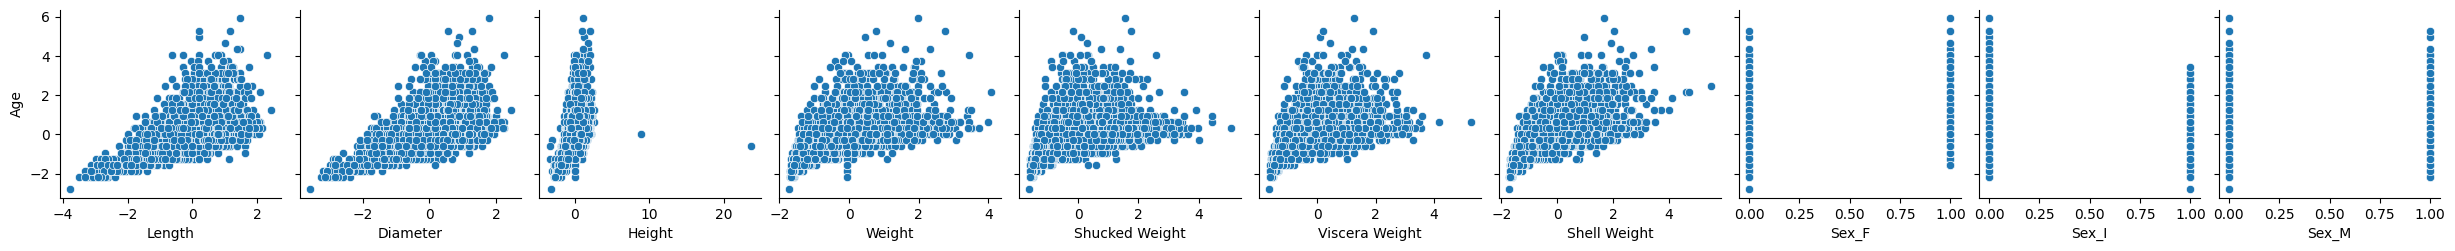

In [ ]:
import seaborn as sns

sns.pairplot(df, x_vars=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Sex_F', 'Sex_I', 'Sex_M'],
             y_vars='Age', kind='scatter')
plt.show()

Observed that relationship between certain features and the target variable are non-linear while others seem to have linear relationship. Decide to approach fine tuning with polynomial regression to capture non-linear relationships in the data.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

#degrees to iterate over
degrees = [1, 2]

for degree in degrees:
    #create polynomial regression pipeline
    polynomial_regression = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    )

    #fit polynomial regression model on preprocessed training data
    polynomial_regression.fit(X_train_processed, y_train)

    #predictions on the preprocessed training data
    poly_linear_predictions_train = polynomial_regression.predict(X_train_processed)

    #evaluate the polynomial regression model on training data
    poly_mse_train = mean_squared_error(y_train, poly_linear_predictions_train)
    poly_rmse_train = np.sqrt(poly_mse_train)
    poly_r2_train = r2_score(y_train, poly_linear_predictions_train)

    #predictions on the preprocessed test data
    poly_linear_predictions_test = polynomial_regression.predict(X_test_processed)

    #evaluate the polynomial regression model on test data
    poly_mse_test = mean_squared_error(y_test, poly_linear_predictions_test)
    poly_rmse_test = np.sqrt(poly_mse_test)
    poly_r2_test = r2_score(y_test, poly_linear_predictions_test)

    #print evaluation metrics for polynomial regression with current degree
    print("Polynomial Regression (Degree {}):".format(degree))
    print("Training Set - Minimum MSE:", poly_mse_train)
    print("Training Set - RMSE:", poly_rmse_train)
    print("Training Set - R-squared:", poly_r2_train)
    print("Test Set - Minimum MSE:", poly_mse_test)
    print("Test Set - RMSE:", poly_rmse_test)
    print("Test Set - R-squared:", poly_r2_test)
    print()


Polynomial Regression (Degree 1):
Training Set - Minimum MSE: 0.4959801537727281
Training Set - RMSE: 0.7042585844508593
Training Set - R-squared: 0.5215142895403279
Test Set - Minimum MSE: 0.47303457947823324
Test Set - RMSE: 0.6877750936739664
Test Set - R-squared: 0.4797450650636431

Polynomial Regression (Degree 2):
Training Set - Minimum MSE: 0.4999212448332961
Training Set - RMSE: 0.7070510906810739
Training Set - R-squared: 0.5177122104818052
Test Set - Minimum MSE: 0.7645285212596024
Test Set - RMSE: 0.8743732162295471
Test Set - R-squared: 0.15915293862104196



I attempted polynomial regression with different degrees as to compare and contrast with aim to yield best results.

It's evident that the polynomial regression model with degree 1 performs better than the one with degree 2, as it has lower MSE, RMSE, and higher R-squared on the test set. Additionally, the model with degree 2 seems to be overfitting, as indicated by the higher MSE and RMSE on the test set compared to the training set. Meanwhile, polynomial regression model with degree 1 does not exhibit signs of overfitting. This conclusion is drawn from the fact that the metrics on the test set are quite similar to those on the training set, suggesting that the model generalizes well to unseen data. Specifically, the MSE, RMSE, and R-squared values on the test set are comparable to those on the training set, indicating that the model's performance on unseen data is consistent with its performance on the training data. Therefore, the polynomial regression model with degree 1 appears to be appropriately fitting the data without overfitting.

###Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#initialize Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)

#fit the model on the preprocessed training data
tree_model.fit(X_train_processed, y_train)

#predictions on the preprocessed training data
tree_predictions_train = tree_model.predict(X_train_processed)

#evaluate the model on the training set
tree_mse_train = mean_squared_error(y_train, tree_predictions_train)
tree_rmse_train = np.sqrt(tree_mse_train)
tree_r2_train = r2_score(y_train, tree_predictions_train)

#evaluation metrics for the training set
print("Decision Tree Regression (Training Set):")
print("Minimum MSE:", tree_mse_train)
print("RMSE:", tree_rmse_train)
print("R-squared:", tree_r2_train)

#predictions on the preprocessed test data
tree_predictions_test = tree_model.predict(X_test_processed)

#evaluate the model on the test set
tree_mse_test = mean_squared_error(y_test, tree_predictions_test)
tree_rmse_test = np.sqrt(tree_mse_test)
tree_r2_test = r2_score(y_test, tree_predictions_test)

#evaluation metrics for the test set
print("\nDecision Tree Regression (Test Set):")
print("Minimum MSE:", tree_mse_test)
print("RMSE:", tree_rmse_test)
print("R-squared:", tree_r2_test)

Decision Tree Regression (Training Set):
Minimum MSE: 1.0351566383169341e-33
RMSE: 3.2173850225251784e-17
R-squared: 1.0

Decision Tree Regression (Test Set):
Minimum MSE: 0.8852231951274737
RMSE: 0.9408630055047725
R-squared: 0.026410000949222856


On the training set, the model achieved extremely low MSE and RMSE values, along with a perfect R-squared score of 1.0, indicating that the model perfectly fits the training data. However, on the test set, the model's performance dropped significantly, with higher MSE and RMSE values and a very low R-squared score. This suggests that the model did not generalize well to unseen data and may have overfit the training data.

Proceed with fine-tuning the model:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#define hyperparameter distributions to search
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

#initialize Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)

#initialize Randomized Search Cross-Validation
random_search = RandomizedSearchCV(tree_model, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

#fit the Randomized Search to the preprocessed training data
random_search.fit(X_train_processed, y_train)

#get the best hyperparameters
best_params = random_search.best_params_

#print the best hyperparameters
print("Best Hyperparameters:", best_params)

#get the best model from the random search
best_tree_model = random_search.best_estimator_

#predictions on the preprocessed test data using the best model
best_tree_predictions = best_tree_model.predict(X_test_processed)

#evaluate best model
best_tree_mse = mean_squared_error(y_test, best_tree_predictions)
best_tree_rmse = np.sqrt(best_tree_mse)
best_tree_r2 = r2_score(y_test, best_tree_predictions)

#evaluation metrics
print("Best Decision Tree Regression:")
print("Minimum MSE:", best_tree_mse)
print("RMSE:", best_tree_rmse)
print("R-squared:", best_tree_r2)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 3}
Best Decision Tree Regression:
Minimum MSE: 0.5391196914494014
RMSE: 0.7342477044222893
R-squared: 0.4070630516963645


The Decision Tree Regression model has a higher MSE and RMSE compared to the initial Linear Regression model, indicating that it performs worse in terms of prediction accuracy.
The R-squared value of the Decision Tree Regression model is lower than that of the initial Linear Regression model, suggesting that the Decision Tree model explains less of the variance in the target variable compared to the Linear Regression model.

Checking for overfitting:

In [ ]:
#evaluate the best model on the training set
best_tree_predictions_train = best_tree_model.predict(X_train_processed)

#calculate evaluation metrics for the training set
best_tree_mse_train = mean_squared_error(y_train, best_tree_predictions_train)
best_tree_rmse_train = np.sqrt(best_tree_mse_train)
best_tree_r2_train = r2_score(y_train, best_tree_predictions_train)

#evaluation metrics for the training set
print("Decision Tree Regression (Training Set):")
print("Minimum MSE:", best_tree_mse_train)
print("RMSE:", best_tree_rmse_train)
print("R-squared:", best_tree_r2_train)

Decision Tree Regression (Training Set):
Minimum MSE: 0.33362500321165217
RMSE: 0.577602807482488
R-squared: 0.6781427735070487


MSE on the training set is significantly lower than that on the test set, indicating overfitting.

###K-Nearest Neighbours Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#initialize KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)

#fit the model on the preprocessed training data
knn_model.fit(X_train_processed, y_train)

#predictions on the preprocessed test data
knn_predictions = knn_model.predict(X_test_processed)

#evaluate the model
mse_knn = mean_squared_error(y_test, knn_predictions)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, knn_predictions)

#evaluation metrics
print("KNN Regression:")
print("Minimum MSE:", mse_knn)
print("RMSE:", rmse_knn)
print("R-squared:", r2_knn)


KNN Regression:
Minimum MSE: 0.43884304438597826
RMSE: 0.662452295932302
R-squared: 0.5173497469125179


Checking for overfitting:

In [ ]:
#predictions on the preprocessed training data
knn_train_predictions = knn_model.predict(X_train_processed)

#evaluate the model on the training set
mse_knn_train = mean_squared_error(y_train, knn_train_predictions)
rmse_knn_train = np.sqrt(mse_knn_train)
r2_knn_train = r2_score(y_train, knn_train_predictions)

#evaluation metrics for the training set
print("KNN Regression (Training Set):")
print("Minimum MSE:", mse_knn_train)
print("RMSE:", rmse_knn_train)
print("R-squared:", r2_knn_train)


KNN Regression (Training Set):
Minimum MSE: 0.36536020437525396
RMSE: 0.6044503324304272
R-squared: 0.6475269511604458


The performance on the training set is better than on the test set, indicating some degree of overfitting. However, the difference in performance is not extreme, suggesting that the model generalizes reasonably well to unseen data.

KNN Regression has a lower MSE (0.4388) compared to the initial model (0.4730), indicating that, on average, the KNN Regression model's predictions are closer to the actual values. Similarly, the RMSE for KNN Regression (0.6625) is lower than that of the initial model (0.6878), suggesting that the KNN Regression model's predictions have less variability or error compared to the initial model. The R-squared value for KNN Regression (0.5173) is higher than that of the initial model (0.4797), indicating that the KNN Regression model explains more of the variance in the target variable compared to the initial model. Overall, based on these evaluation metrics, the KNN Regression model outperforms the initial model in terms of predictive accuracy and explanatory power.

Proceed with fine tuning the model:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

#define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]  # Power parameter for the Minkowski distance metric
}

#create KNN Regression model
knn_model = KNeighborsRegressor()

#perform grid search cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_processed, y_train)

#get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#get best knn model
best_knn_model = grid_search.best_estimator_

#evaluate the best model on test set
best_knn_predictions = best_knn_model.predict(X_test_processed)
best_knn_mse = mean_squared_error(y_test, best_knn_predictions)
best_knn_rmse = np.sqrt(best_knn_mse)
best_knn_r2 = r2_score(y_test, best_knn_predictions)

#evaluation metrics
print("Best KNN Regression:")
print("Minimum MSE:", best_knn_mse)
print("RMSE:", best_knn_rmse)
print("R-squared:", best_knn_r2)


Best Hyperparameters: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Best KNN Regression:
Minimum MSE: 0.4165919074613315
RMSE: 0.645439313538718
R-squared: 0.5418220884604887


The best KNN Regression model outperforms the initial model in terms of all evaluation metrics. It has lower MSE, lower RMSE, and a higher R-squared value, indicating better predictive performance.

Proceed with checking for overfitting:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

#initialize KNN regressor with the best parameters
best_knn_regressor = KNeighborsRegressor(n_neighbors=11, weights='distance')

#perform cross-validation
cv_scores = cross_val_score(best_knn_regressor, X_train_processed, y_train, cv=5, scoring='neg_mean_squared_error')

#convert negative MSE to positive
cv_scores = -cv_scores

#calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#print cross-validation results
print("Cross-Validation MSE: {:.4f} (+/- {:.4f})".format(mean_cv_score, std_cv_score))


Cross-Validation MSE: 0.5382 (+/- 0.0406)


My best KNN model seems to have a relatively stable performance across different folds of the data. Since the standard deviation is relatively small compared to the mean MSE, it indicates that the performance of the model is consistent across different subsets of the data. This suggests that the model is not overly sensitive to the specific training and validation splits and is likely not overfitting to the training data. Therefore, based on the cross-validation results, there is no strong evidence to suggest overfitting for the best KNN model.

##Model Evaluation


All models were evaluated on overfitting. All linear regression models did not overfit, besides Lasso regression with optimal alpha that showed slight overfitting. Polynomial regression with degree 2 appears to be overfitting, whereas that of degree 1 generalizes well on unseen data and shows no signs of overfitting. Both Decision Tree regression models exhibited signs of overfitting and did not perform well in terms of prediction accuracy. K-Nearest Neighbors (KNN) regression model initially exhibit some degree of overfitting, however after fine-tuning the model, it outperformed the initial model and performed consistently across different subsets of data. Its cross-validation results showed no signs of overfitting for the best KNN model.

**MINIMUM MSE RESULT**
>
| Model                        | Minimum MSE   |
|------------------------------|---------------|
| Initial Linear Regression   | 0.4730        |
| Lasso Regression            | 0.5526        |
| Ridge Regression            | 0.4730        |
| Lasso Regression (optimal alpha) | 0.4706   |
| Ridge Regression (optimal alpha) | 0.4724   |
| Polynomial Regression (Degree 1) | 0.4730   |
| Polynomial Regression (Degree 2) | 0.7645   |
| Decision Tree Regression    | 0.8852        |
| Best Decision Tree Regression | 0.5391       |
| KNN Regression              | 0.4388        |
| Best KNN Regression         | 0.4166        |


**RMSE RESULT**
>
| Model                        | RMSE          |
|------------------------------|---------------|
| Initial Linear Regression   | 0.6878        |
| Lasso Regression            | 0.7434        |
| Ridge Regression            | 0.6877        |
| Lasso Regression (optimal alpha) | 0.6860   |
| Ridge Regression (optimal alpha) | 0.6873   |
| Polynomial Regression (Degree 1) | 0.6878   |
| Polynomial Regression (Degree 2) | 0.8744   |
| Decision Tree Regression    | 0.9409        |
| Best Decision Tree Regression | 0.7342       |
| KNN Regression              | 0.6625        |
| Best KNN Regression         | 0.6454        |


**R-SQUARED RESULT**
>
| Model                        | R-squared    |
|------------------------------|--------------|
| Initial Linear Regression   | 0.4797       |
| Lasso Regression            | 0.3922       |
| Ridge Regression            | 0.4798       |
| Lasso Regression (optimal alpha) | 0.4824  |
| Ridge Regression (optimal alpha) | 0.4805  |
| Polynomial Regression (Degree 1) | 0.4797  |
| Polynomial Regression (Degree 2) | 0.1592  |
| Decision Tree Regression    | 0.0264       |
| Best Decision Tree Regression | 0.4071      |
| KNN Regression              | 0.5173       |
| Best KNN Regression         | 0.5418       |


To reiterate:
>
**Initial linear regression model** explains approximately 48% of the variance in the target variable and has moderate level of predictive performance.
>
**Lasso regression** with optimal alpha slightly reduces the MSE and RMSE, and slightly improves the R-squared value compared to the initial Lasso regression.
>
**Ridge regression** with optimal alpha shows a similar MSE and RMSE as the initial Ridge regression, but slightly improves the R-squared value.
>
**Polynomial Regression (Degree 1)** and the Initial Linear Regression model have almost identical minimum MSE and RMSE. The R-squared values are also very similar, indicating that both models explain approximately 48% of the variance in the target variable (Age). Both models perform similarly in capturing the relationship between the features and the target variable. However, worth noting that Polynomial Regression (Degree 1) might capture potential nonlinear relationships better than the initial Linear Regression model, although in this case, the improvement is marginal.
>
The best **Decision Tree Regression model** has a higher MSE and RMSE compared to the initial Linear Regression model, indicating that it performs worse in terms of prediction accuracy. The R-squared value of the Decision Tree Regression model is lower than that of the initial Linear Regression model, suggesting that the Decision Tree model explains less of the variance in the target variable compared to the Linear Regression model.
>
The best **KNN Regression model** outperforms the initial model in terms of all evaluation metrics. It has lower MSE, lower RMSE, and a higher R-squared value, indicating better predictive performance. This best model seems to have a relatively stable performance across different folds of the data. Since the standard deviation is relatively small compared to the mean MSE, it indicates that the performance of the model is consistent across different subsets of the data. This suggests that the model is not overly sensitive to the specific training and validation splits and is likely not overfitting to the training data. Therefore, based on the cross-validation results, there is no strong evidence to suggest overfitting for the best KNN model.

##Conclusion

Overall, I am selecting my best ***K-Nearest Neighbours Regression Model*** as it has displays most optimal performance in terms of evaluation metrics (as revised below). Cross validation results on this best model has also shown that the model is not too sensitive to training and validation splits. It also shows no strong evidence to overfitting.

| Metric  | Value    |
|---------|----------|
| Minimum MSE   | 0.4166   |
| RMSE    | 0.6454   |
| R-squared   | 0.5418   |


-end of labwork 1-